# Project: FIFA 21 statistics

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 2000
pd.options.display.min_rows = 300
pd.options.display.max_columns = 200

## Read and Reform
- Read in the fifa file and clean up in accordance to what we need

I have created 4 different DataFrames out of the original one. 
- **Fifa basics**: Contains information about the players club, age, position, height, weight etc
- **Fifa skill**: Contains all the low level skill attributes (points) a player has.
- **Fifa specials**: Contains the skill summary (that is shown in the spider plot for every player in fifa). Wrong foot  stats, Skill move, international reputation workrate etc.
- **Fifa position**: Contains information about how a players points are for all the positions a player can have.

I have also secluded some columns from the original DataFrame (e.g Contract, Hits etc.)

In [2]:
## We have 16176 unique players, with 167 Nationalities and in 917 clubs.

fifa = pd.read_csv("fifa21_male2.csv")

/Users/philipgordin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [724]:
fifa_basics = fifa.iloc[:,:20].copy()

In [725]:
fifa_skill = fifa[["ID", "Name",'Attacking','Crossing','Finishing','Heading Accuracy','Short Passing','Volleys','Skill',
 'Dribbling','Curve','FK Accuracy','Long Passing','Ball Control','Movement','Acceleration','Sprint Speed',
'Agility','Reactions','Balance','Power','Shot Power','Jumping','Stamina','Strength','Long Shots','Mentality',
'Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Defending','Marking','Standing Tackle',
 'Sliding Tackle','Goalkeeping','GK Diving','GK Handling','GK Kicking','GK Positioning','GK Reflexes',]].copy()

In [812]:
fifa_specials = fifa[["ID","Club", "Name",'Total Stats','Base Stats','W/F','SM','A/W','D/W','IR','PAC','SHO','PAS','DRI','DEF','PHY',]].copy()

In [727]:
fifa_position = fifa[["ID","Name","BP", "Position", 'LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
'LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK']].copy()

In [728]:
## Changing the height from feet & inches to cm, as well as changing the datatype to float. 

height_all = pd.DataFrame(fifa_basics.Height.str.strip('"').str.split("'").tolist(), columns = ["Feet", "Inches"])
height_all.Feet = height_all.Feet.astype("float")
height_all.Inches = height_all.Inches.astype("float")
height_all.Feet = height_all.Feet * 30.48
height_all.Inches = height_all.Inches * 2.54
height_all["Height(cm)"] = height_all.Feet + height_all.Inches
height_all.drop(columns = ["Feet", "Inches"], inplace = True)
fifa_basics["Height(cm)"] = height_all["Height(cm)"]
fifa_basics.drop(columns = ["Height"], inplace = True)

In [729]:
## Changing the Weight to integer datatype as well as converting it to kg from lbs.

fifa_basics.Weight = fifa_basics.Weight.str.replace("lbs","").astype("int")
kg_per_lbs = 0.45359237
fifa_basics.Weight = (fifa_basics.Weight * kg_per_lbs).round(2)

In [730]:
## Changing the values in a Players Value and Wage to full numbers and cleaning away units such as K or €. Moreover,
# changing datatypes to int.

fifa_basics.Value = fifa_basics.Value.str.replace("€", "").str.replace("K","000").str.replace("M","000000").str.replace(".","").astype("int")
fifa_basics.Wage = fifa_basics.Wage.str.replace("€", "").str.replace("K","000").astype("int")

In [731]:
## Droping all rows where the wage is 0, these players arent active and will therefor be secluded from my analysis.

fifa_basics.loc[fifa_basics.Wage == 0].index
fifa_basics.drop(fifa_basics.loc[fifa_basics.Wage == 0].index, inplace = True)

In [813]:
## Cleaning the fifa_specials DataFrame, removing stars, changing dtypes etc.

fifa_specials["W/F"] = fifa_specials["W/F"].str.replace("★","")
fifa_specials["SM"] = fifa_specials["SM"].str.replace("★","")
fifa_specials["IR"] = fifa_specials["IR"].str.replace("★","")
fifa_specials["W/F"] = fifa_specials["W/F"].astype("int")
fifa_specials["SM"] = fifa_specials["SM"].astype("int")
fifa_specials["IR"] = fifa_specials["IR"].astype("int")

In [1079]:
fifa_basics.drop(columns = ["Team & Contract", "Joined", "Release Clause", "Contract"], inplace = True)

## Find top teams and top players and clean
After creating my "subDataFrames" I decided to look at mainly fifa_basics and later on fifa_specials. Since the information from fifa_position could be concluded in (e.g BP or Position) fifa_basics i decided to not use it.

As well, the information in the fifa_skill dataframe, could be on a higher level concluded from the fifa_specials dataframe. I haven't completely rejected it, i might use it in further analysis.

In the next part I have taken out the top 15 teams, with best average OVA, excluding "teams" with one player and/or less than 12 players in total. Lastly, i chose the best 20 players from the best 15 teams, placed in a new DataFram called fifa_top_basic with the basic information regarding these players.

In [314]:
fifa.Nationality.unique().tolist()
mask = fifa_basics.Club.isin(fifa.Nationality.unique().tolist())
# Top 15 clubs by mean OVA
top_15_clubs = fifa_basics.loc[~mask].groupby("Club").mean().sort_values(by="OVA", ascending = False).head(25)
top_15_clubs.drop(labels = ["Palermo","Akhisar Belediyespor", "Dinamo Moscow", "Fluminense","Palmeiras","São Paulo","Flamengo"], inplace =True)
top_15_clubs = top_15_clubs[:15]

['Italy',
 'Spain',
 'England',
 'Trinidad &amp; Tobago',
 'Germany',
 'Turkey',
 'Wales',
 'Republic of Ireland',
 'Nigeria',
 'Brazil',
 'Australia',
 'Hungary',
 'Argentina',
 'Portugal',
 'Netherlands',
 'France',
 'Norway',
 'Tunisia',
 'Bulgaria',
 'Poland',
 'United States',
 'Mali',
 'Finland',
 'Iceland',
 'Czech Republic',
 'Serbia',
 'Sweden',
 'Georgia',
 'Denmark',
 'Senegal',
 'Israel',
 'Cameroon',
 'Greece',
 'Scotland',
 'Ukraine',
 'China PR',
 'Colombia',
 'Belgium',
 'Ivory Coast',
 'Switzerland',
 'Canada',
 'Chile',
 'Peru',
 'Paraguay',
 'Mexico',
 'Japan',
 'Ghana',
 'Korea Republic',
 'Belarus',
 'Egypt',
 'Congo',
 'Uruguay',
 'South Africa',
 'Northern Ireland',
 'Togo',
 'Jamaica',
 'Austria',
 'Algeria',
 'Morocco',
 'Albania',
 'North Macedonia',
 'Slovenia',
 'Madagascar',
 'Croatia',
 'Kosovo',
 'Estonia',
 'Moldova',
 'Bosnia Herzegovina',
 'Russia',
 'Romania',
 'DR Congo',
 'Antigua &amp; Barbuda',
 'Burkina Faso',
 'Panama',
 'Gibraltar',
 'Venezuela

In [487]:

top_15_clubs.index
fifa_basic_top = fifa_basics.loc[fifa_basics.Club.isin(top_15_clubs.index)].copy()
fifa_basic_top.reset_index(drop = True, inplace = True)
fifa_basic_top

In [491]:
## Changing the height from feet & inches to cm, as well as changing the datatype to float. 

height = pd.DataFrame(fifa_basic_top.Height.str.strip('"').str.split("'").tolist(), columns = ["Feet", "Inches"])
height.Feet = height.Feet.astype("float")
height.Inches = height.Inches.astype("float")
height.Feet = height.Feet * 30.48
height.Inches = height.Inches * 2.54
height["Height(cm)"] = height.Feet + height.Inches
height.drop(columns = ["Feet", "Inches"], inplace = True)
fifa_basic_top["Height(cm)"] = height["Height(cm)"]
fifa_basic_top.drop(columns = ["Height"], inplace = True)

In [494]:
## Changing the Weight to integer datatype as well as converting it to kg from lbs.

fifa_basic_top.Weight = fifa_basic_top.Weight.str.replace("lbs","").astype("int")
kg_per_lbs = 0.45359237
fifa_basic_top.Weight = (fifa_basic_top.Weight * kg_per_lbs).round(2)

In [511]:
## Changing the values in a Players Value and Wage to full numbers and cleaning away units such as K or €. Moreover,
# changing datatypes to int.

fifa_basic_top.Value = fifa_basic_top.Value.str.replace("€", "").str.replace("K","000").str.replace("M","000000").str.replace(".","").astype("int")
fifa_basic_top.Wage = fifa_basic_top.Wage.str.replace("€", "").str.replace("K","000").astype("int")

In [ ]:
## Droping all rows where the wage is 0, these players arent active and will therefor be secluded from my analysis.

fifa_basic_top.loc[fifa_basic_top.Wage == 0].index
fifa_basic_top.drop([1, 3, 6, 7, 8, 9, 10, 11, 12, 16, 18, 19, 27, 28, 32, 48, 84], inplace = True)

In [ ]:
## Taking out the top 20 players from the different clubs, based on OVA.

fifa_basic_top = fifa_basic_top.sort_values(by = ["Club", "OVA"], ascending = False)
temp = fifa_basic_top.copy()
temp.reset_index(inplace = True)
club_lst = temp.Club.unique().tolist()

index_lst = []

for i in club_lst:
    index_temp = temp.loc[temp.Club == i].head(20).index.tolist()
    
    index_lst += index_temp

fifa_basic_top = temp.loc[index_lst].copy()

## Plotting

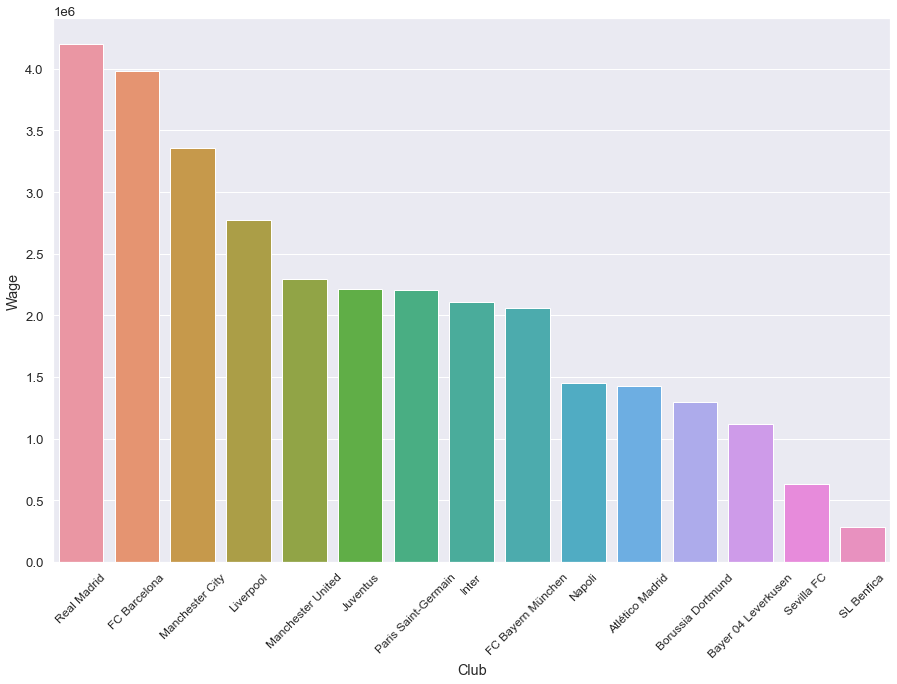

In [1372]:
## Wage spent in total by the clubs in a barplot

df = fifa_basic_top.groupby("Club")[["Wage"]].sum().sort_values(by="Wage", ascending = False)


plt.figure(figsize = (15,10))
plt.xticks(rotation=45, fontsize = 12)

sns.barplot(x = df.index, y = df.Wage, data = df)

plt.show()

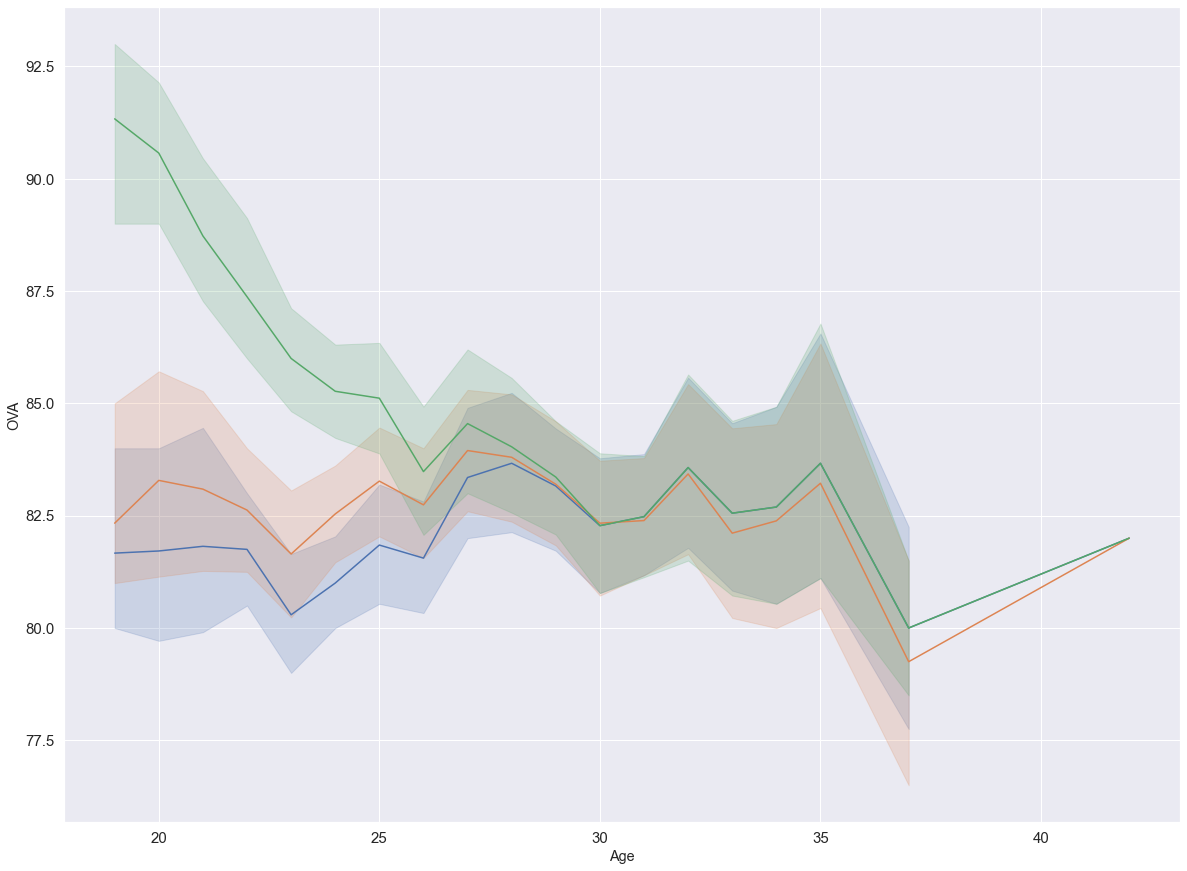

In [1381]:
# Plotting relation between age and OVA, BOV and POT for the top players and clubs
plt.figure(figsize = (20,15))
sns.set_style("darkgrid")
sns.lineplot(x = "Age", y = "OVA", data = fifa_basic_top)
sns.lineplot(x = "Age", y = "BOV", data = fifa_basic_top)
sns.lineplot(x = "Age", y = "POT", data = fifa_basic_top)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

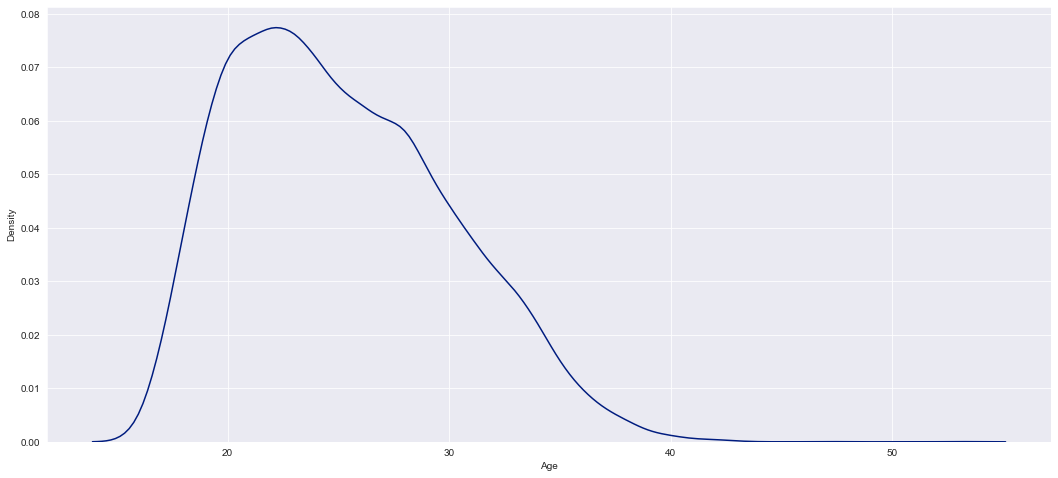

In [694]:
plt.figure(figsize = (18,8))
sns.kdeplot(x = fifa_basics.Age)
plt.show()

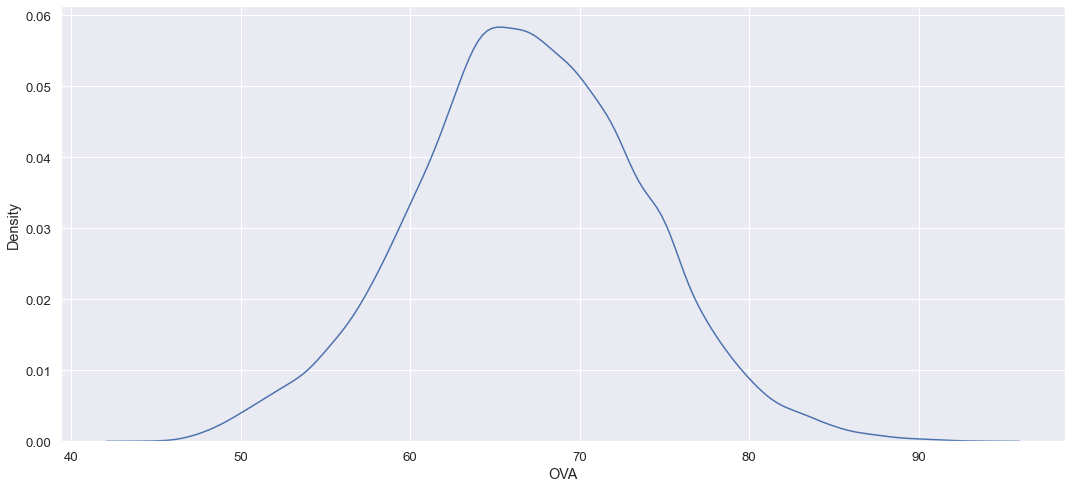

In [1386]:
plt.figure(figsize = (18,8))
sns.kdeplot(x = fifa_basics.OVA)
plt.show()

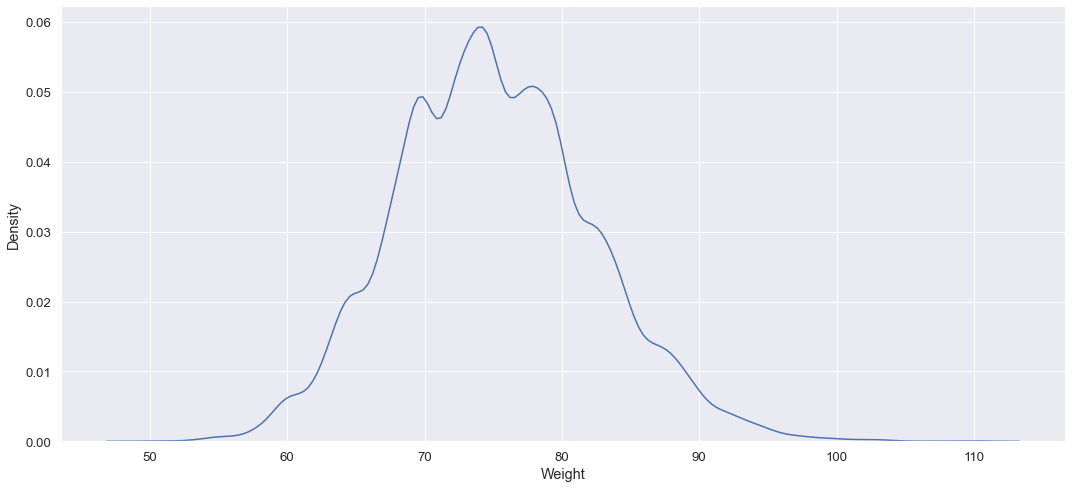

In [1385]:
plt.figure(figsize = (18,8))
sns.kdeplot(x = fifa_basics.Weight)
plt.show()

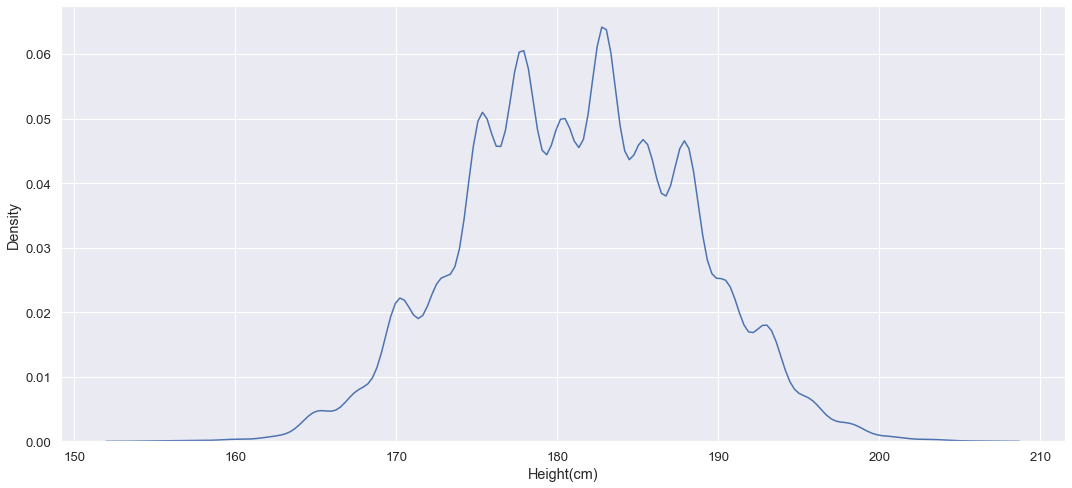

In [1384]:
plt.figure(figsize = (18,8))
sns.kdeplot(x = fifa_basics["Height(cm)"])
plt.show()

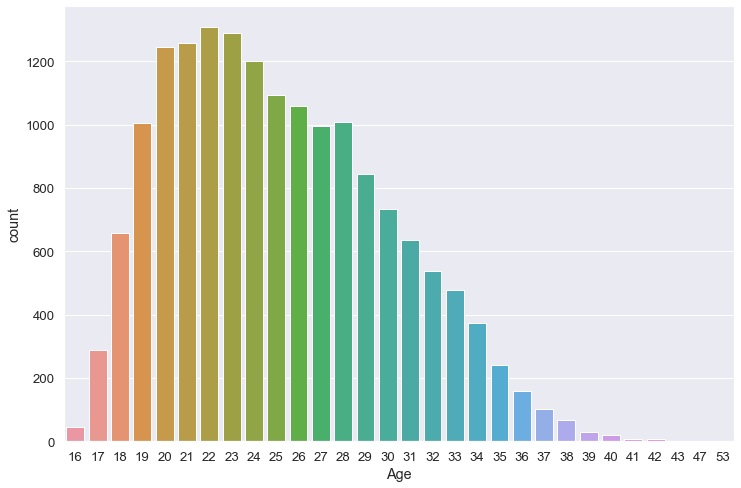

In [1371]:
plt.figure(figsize =(12,8))
sns.countplot(data = fifa_basics, x = fifa_basics.Age)
plt.show()

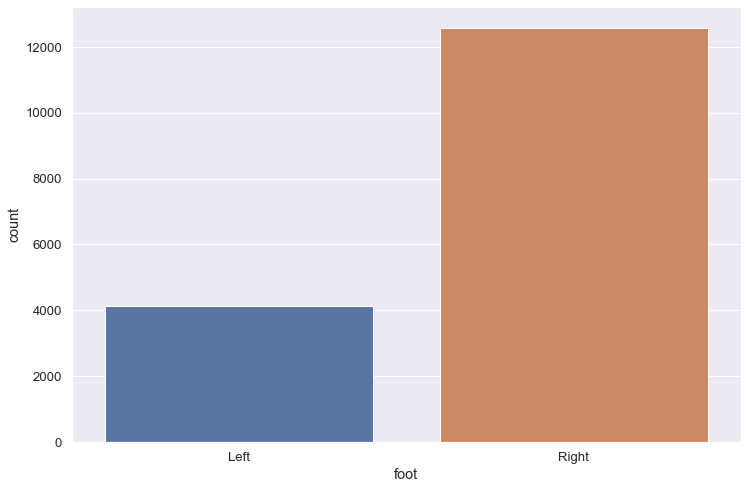

In [1366]:
plt.figure(figsize =(12,8))
sns.countplot(data = fifa_basics, x = fifa_basics.foot)
plt.show()

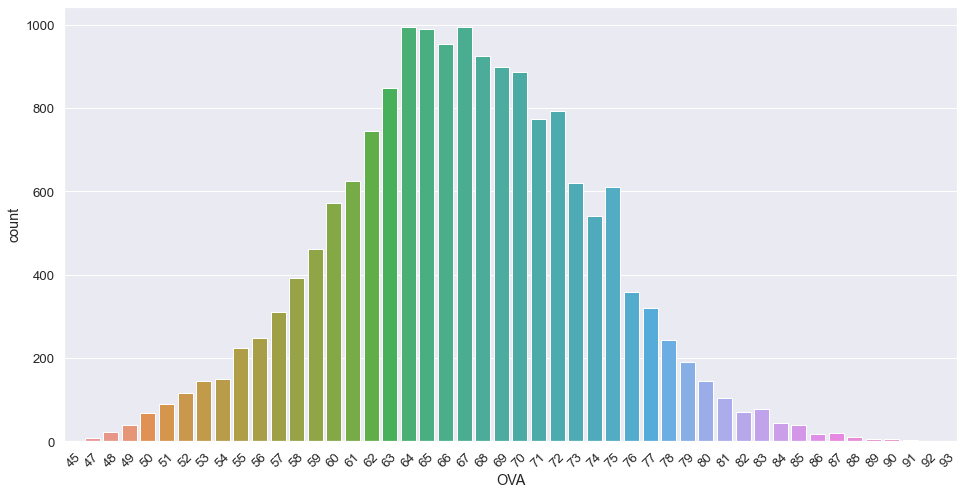

In [1212]:
plt.figure(figsize =(16,8))
sns.countplot(data = fifa_basics, x = fifa_basics.OVA)
plt.xticks(rotation = 45)
plt.show()

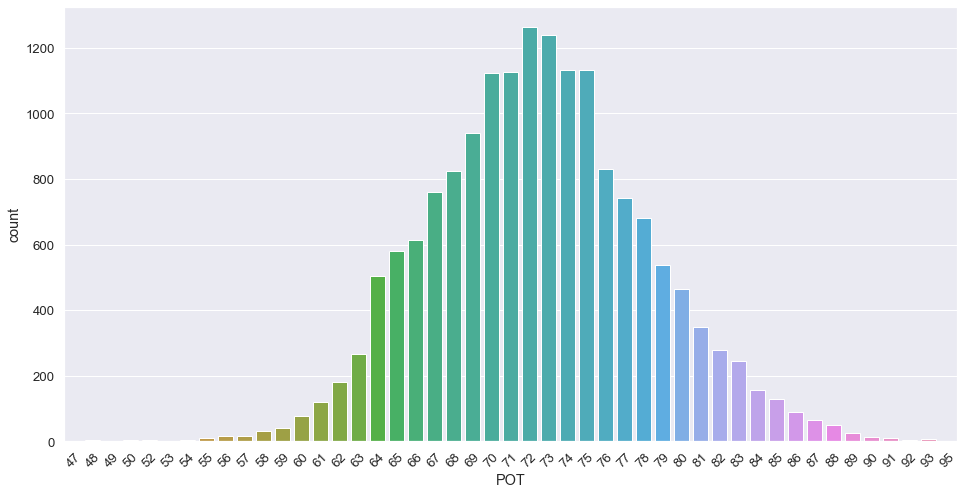

In [1213]:
plt.figure(figsize =(16,8))
sns.countplot(data = fifa_basics, x = fifa_basics.POT)
plt.xticks(rotation = 45)
plt.show()

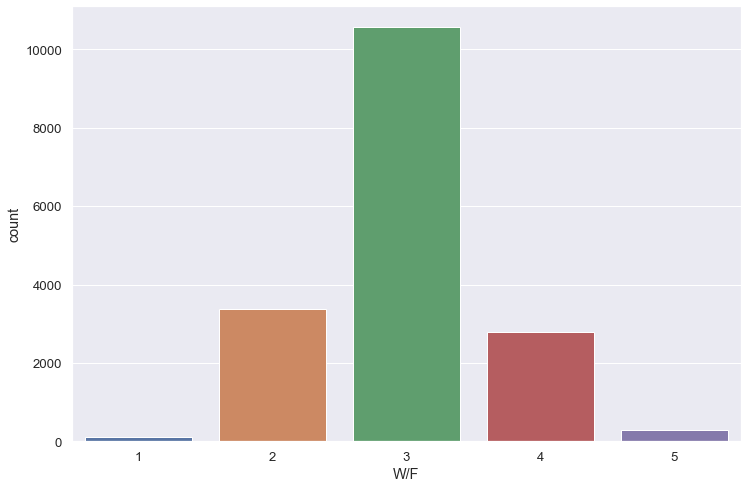

In [1364]:
plt.figure(figsize =(12,8))
sns.countplot(data = fifa_specials, x = fifa_specials["W/F"])
plt.show()

In [1088]:
fifa_basics["growth/k€"] = fifa_basics.Growth / (fifa_basics.Wage / 1000)

In [1351]:
fifa_basic_top.groupby("Club")[["Age","OVA","Growth"]].mean().round(2).sort_values(by="OVA", ascending = False)

,Age,OVA,Growth
Club,,,
Real Madrid,27.15,84.45,2.50
Liverpool,27.05,84.40,1.55
FC Barcelona,27.90,84.25,2.40
Juventus,30.25,84.10,0.90
Manchester City,26.05,83.95,2.85
FC Bayern München,27.75,83.70,2.10
Paris Saint-Germain,29.10,83.20,1.00
Atlético Madrid,27.60,82.95,1.95
Inter,28.80,82.20,1.35


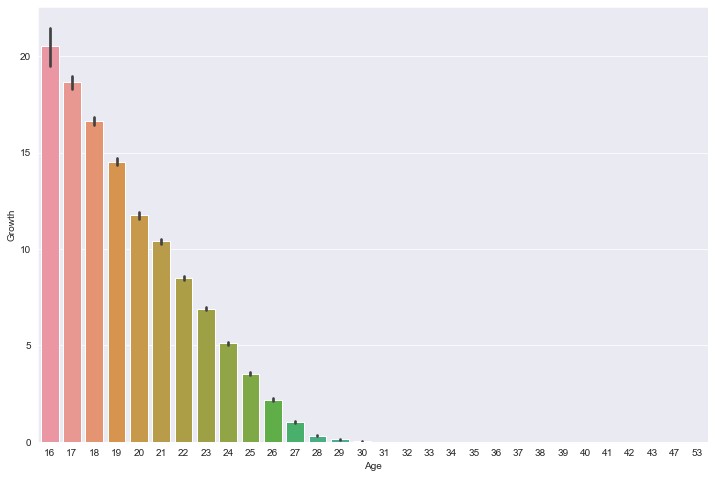

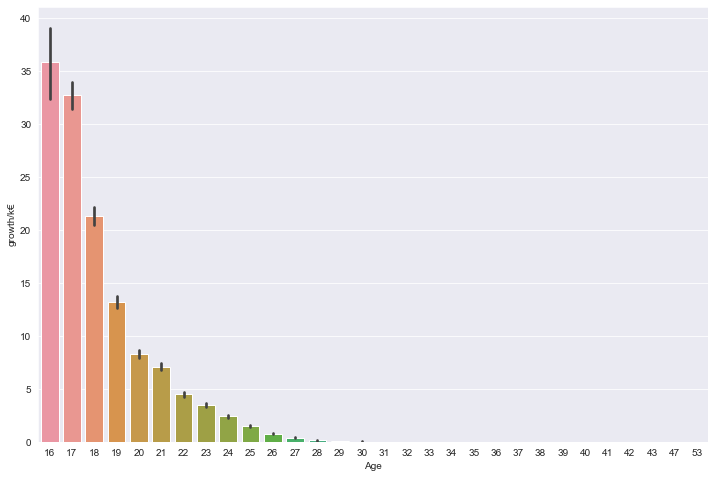

In [1101]:
plt.figure(figsize = (12,8))
sns.barplot(data = fifa_basics, x = "Age", y = "Growth")
plt.show()

plt.figure(figsize = (12,8))
sns.barplot(data = fifa_basics, x = "Age", y = "growth/k€")
plt.show()

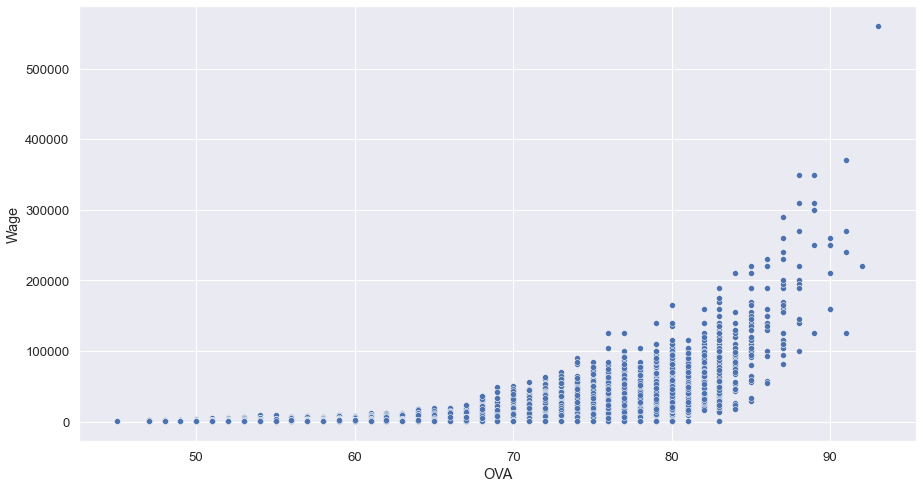

In [1362]:
plt.figure(figsize = (15,8))
sns.scatterplot(data=fifa_basics, x = "OVA", y = "Wage")
plt.show()

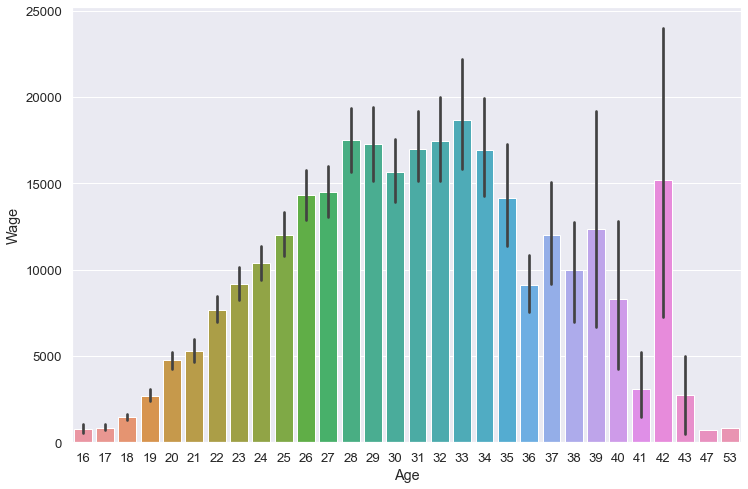

In [1359]:
plt.figure(figsize = (12,8))
sns.barplot(data = fifa_basics, x = "Age", y = "Wage")
plt.show()

In [ ]:
fifa_basic_top.Club.unique().tolist()

In [ ]:
fifa_top_skill = fifa_specials.groupby("Club").mean().loc[['Sevilla FC','SL Benfica','Real Madrid','Paris Saint-Germain','Napoli',
'Manchester United','Manchester City','Liverpool','Juventus','Inter','FC Bayern München','FC Barcelona',
 'Borussia Dortmund','Bayer 04 Leverkusen','Atlético Madrid']][["PAC","SHO","PAS","DRI","DEF","PHY"]].copy()

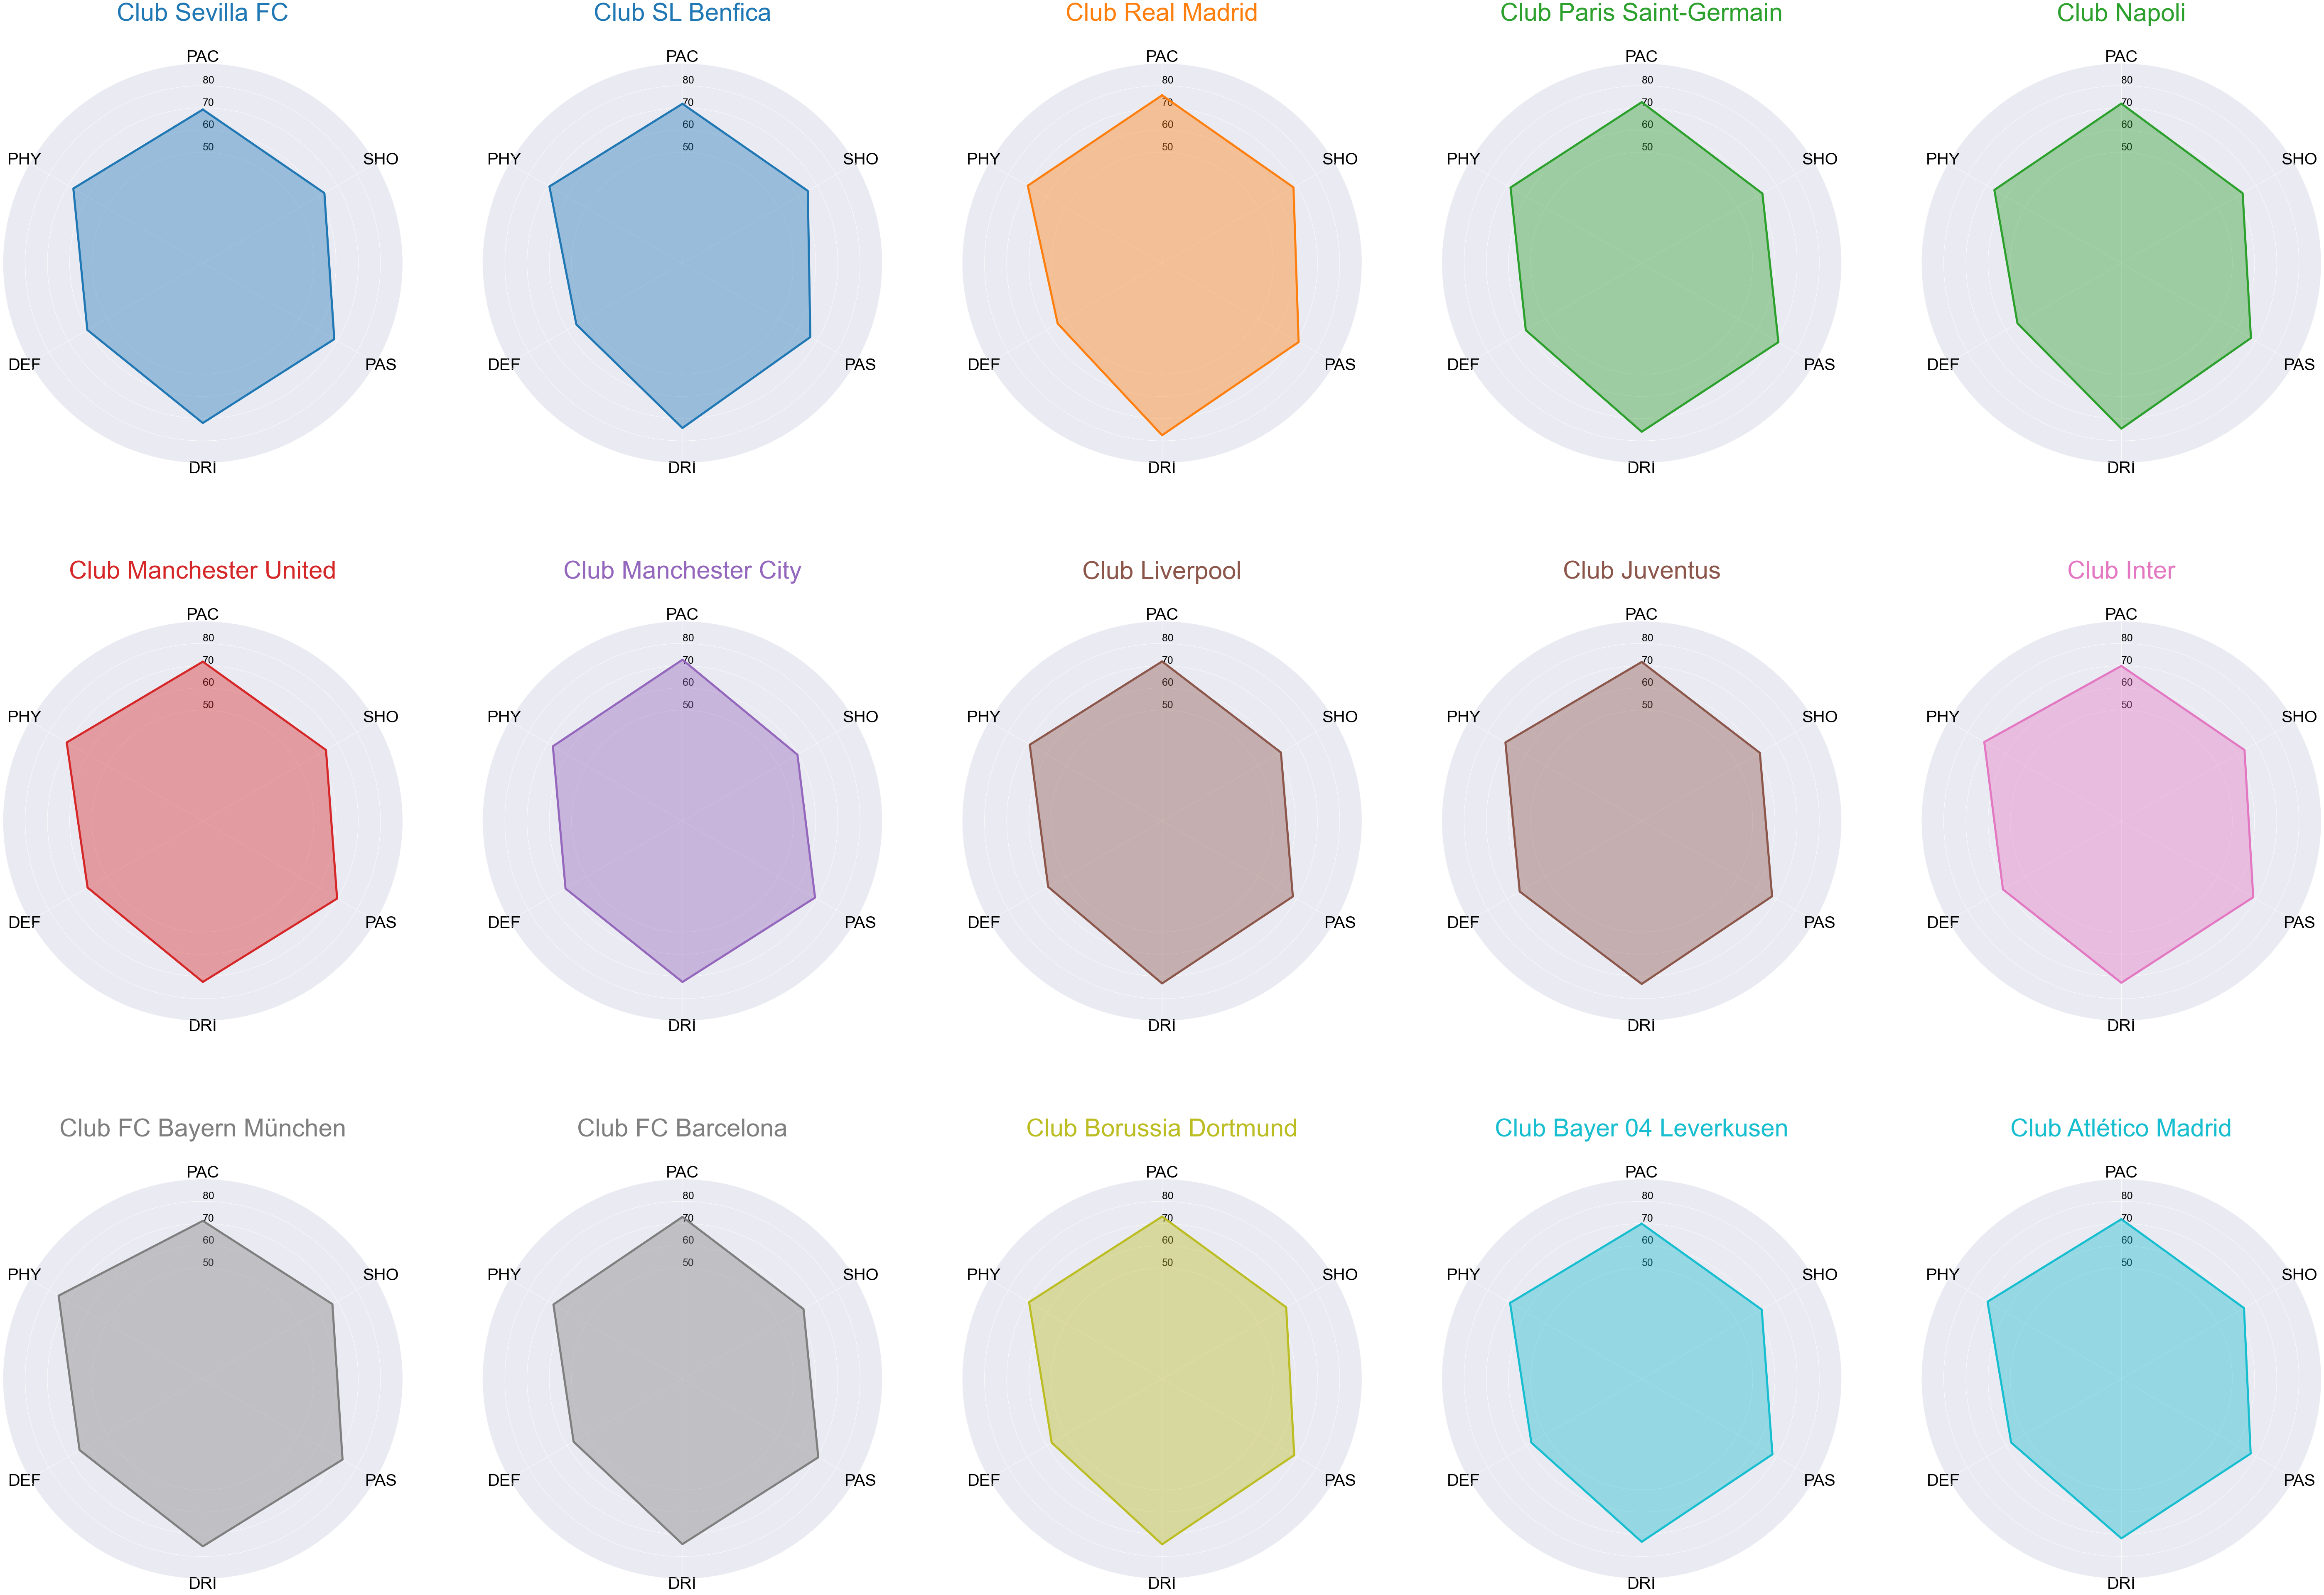

In [1037]:
## Creating spiderplots for the top 15 teams, showing the means of each skill in special skills.

from math import pi
 
# Set data
df = fifa_top_skill
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
# number of variable
    categories=list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,5,row+1, polar=True,)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='black', size=40)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([50,60,70,80], ["50","60","70","80"], color="black", size=25)
    plt.ylim(0,90)

    # Ind1
    values=df.loc[row].drop('Club').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=5, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=60, color=color, y=1.1)
    
#------- PART 2: Apply to all individuals
# initialize the figure
plt.figure(figsize=(100, 70))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("tab10", len(df.index))
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Club '+df['Club'][row], color=my_palette(row))


# Top level analysis

## From all the data

In [698]:
# Age
fifa_basics.Age.mean() # 25.17
fifa_basics.Age.max()  # 53
fifa_basics.Age.min()  # 16 

16

In [703]:
# OVA
fifa_basics.OVA.mean() # 66.91
fifa_basics.OVA.max()  # 93
fifa_basics.OVA.min()  # 45

45

In [706]:
# Weight
fifa_basics.Weight.mean() # 75.12
fifa_basics.Weight.max()  # 110.22
fifa_basics.Weight.min()  # 49.9

49.9

In [711]:
# Height
fifa_basics["Height(cm)"].mean() # 181.23
fifa_basics["Height(cm)"].max()  # 205.74
fifa_basics["Height(cm)"].min()  # 154.9

154.94

In [714]:
# Stats on which foot they play with -> 75% right footers
fifa_basics.foot.value_counts(normalize = True)

Right    0.753203
Left     0.246797
Name: foot, dtype: float64

In [747]:
# Wrong foot and Skill move mean.

fifa_specials["W/F"].mean() # 2.98
fifa_specials["SM"].mean() # 2.45

2.4524963503649637

In [814]:
# Mean value of the skills. 

fifa_specials.PAC.mean() # 68
fifa_specials.SHO.mean() # 54.96
fifa_specials.PAS.mean() # 58.93
fifa_specials.DRI.mean() # 64.21
fifa_specials.DEF.mean() # 50.26
fifa_specials.PHY.mean() # 64.91

64.91071532846715

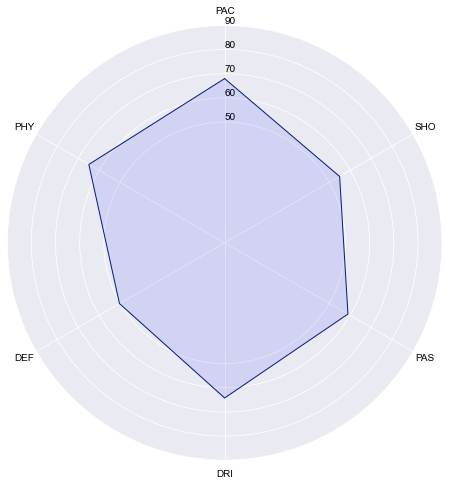

In [1046]:
# Set data
plt.figure(figsize = (12,8))
df = pd.DataFrame({
'group': ["Stats"],
'PAC': 68, 
'SHO': 54.96, 
'PAS': 58.93, 
'DRI': 64.21,
'DEF': 50.26, 
'PHY': 64.91})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='black', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50,60,70,80,90], ["50","60","70","80","90"], color="black", size=10)
plt.ylim(0,90)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)
plt.show()

## In best 20 players from 15 best Clubs

In [774]:
## Mean of Weight and Height for the top 20 players in the 15 top clubs, per position

fifa_basic_top.loc[fifa_basic_top.BP.str.contains("B")][["Weight","Height(cm)"]].mean()
# Weight         79.117961
# Height(cm)    183.989709
fifa_basic_top.loc[fifa_basic_top.BP.str.contains("GK")][["Weight","Height(cm)"]].mean()
# Weight         86.516957
# Height(cm)    190.831304
fifa_basic_top.loc[fifa_basic_top.BP.str.contains("M")][["Weight","Height(cm)"]].mean()
# Weight         73.571032
# Height(cm)    179.473175
fifa_basic_top.loc[fifa_basic_top.BP.str.contains("F")][["Weight","Height(cm)"]].mean()
# Weight         72.030
# Height(cm)    178.816
fifa_basic_top.loc[fifa_basic_top.BP.str.contains("W")][["Weight","Height(cm)"]].mean()
# Weight         69.689091
# Height(cm)    174.682727
fifa_basic_top.loc[fifa_basic_top.BP.str.contains("S")][["Weight","Height(cm)"]].mean()
# Weight         79.664074
# Height(cm)    184.008889

Weight         79.664074
Height(cm)    184.008889
dtype: float64

In [1355]:
fifa_basic_top[["Age", "OVA", "BOV","POT", "Weight", "Growth", "Height(cm)"]].describe().round(2)

,Age,OVA,BOV,POT,Weight,Growth,Height(cm)
count,300.00,300.00,300.00,300.00,300.00,300.00,300.00
mean,27.73,82.31,82.84,84.30,76.69,1.99,181.98
std,4.13,3.63,3.54,3.98,7.80,2.65,7.19
min,19.00,75.00,75.00,75.00,59.00,0.00,162.60
25%,25.00,80.00,80.00,81.00,71.20,0.00,175.30
50%,28.00,82.00,82.00,84.00,76.20,1.00,182.90
75%,31.00,85.00,85.00,87.00,82.10,4.00,188.00
max,42.00,93.00,93.00,95.00,99.80,13.00,198.10


In [1383]:
fifa_basics[["Age", "OVA", "BOV","POT", "Weight", "Growth", "Height(cm)"]].describe().round(2)

,Age,OVA,BOV,POT,Weight,Growth,Height(cm)
count,16702.00,16702.00,16702.00,16702.00,16702.00,16702.00,16702.00
mean,25.18,66.91,67.86,72.50,75.12,5.59,181.23
std,4.90,6.85,6.62,5.72,7.16,5.81,6.88
min,16.00,45.00,44.00,47.00,49.90,0.00,154.94
25%,21.00,62.00,64.00,69.00,69.85,0.00,175.26
50%,25.00,67.00,68.00,72.00,74.84,4.00,180.34
75%,29.00,72.00,72.00,76.00,79.83,10.00,185.42
max,53.00,93.00,93.00,95.00,110.22,26.00,205.74


In [1387]:
fifa_specials.describe()

,ID,Total Stats,Base Stats,W/F,SM,IR,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,1631.256175,361.372146,2.985927,2.452496,1.152234,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,260.357024,40.252290,0.672551,0.781285,0.461311,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,731.000000,228.000000,1.000000,1.000000,1.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,1492.000000,333.000000,3.000000,2.000000,1.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,1659.000000,362.000000,3.000000,2.000000,1.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,1812.000000,390.000000,3.000000,3.000000,1.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,2316.000000,498.000000,5.000000,5.000000,5.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


## Merging back top basic with skills DataFrame

In [1173]:
fifa_compare = fifa_basic_top.merge(fifa_specials, on = "ID")

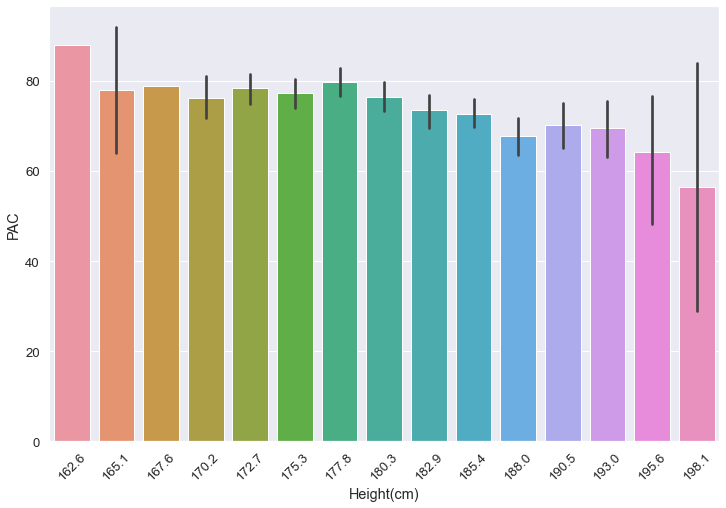

In [1174]:
plt.figure(figsize = (12,8))
sns.barplot(data = fifa_compare, x = "Height(cm)", y = "PAC")
plt.xticks(rotation = 45)
plt.show()

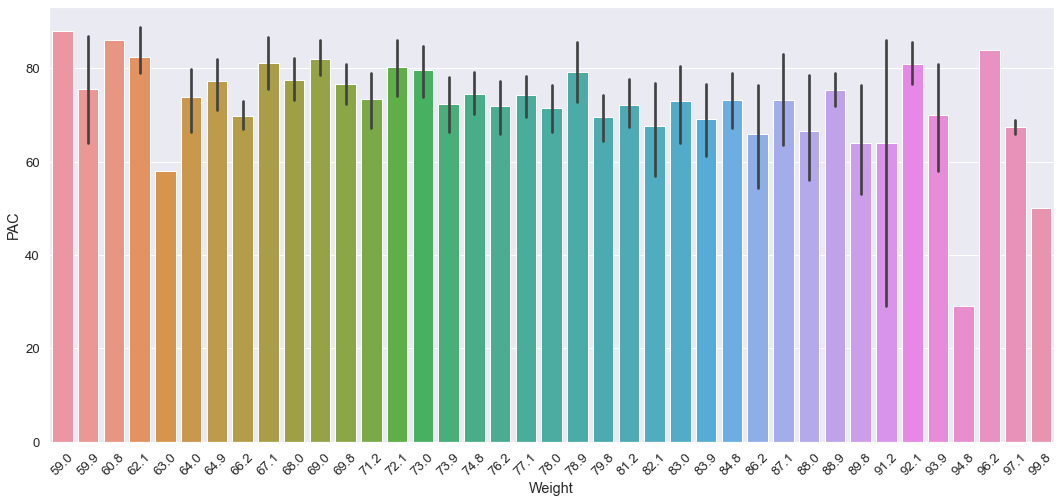

In [1182]:
plt.figure(figsize = (18,8))
sns.barplot(data = fifa_compare, x = "Weight", y = "PAC")
plt.xticks(rotation = 45)
plt.show()

In [1390]:
fifa_compare.loc[fifa_compare.PAC > 80 ].sort_values(by = "PAC", ascending =False)

,Club_x,Name_x,ID,Age,OVA,Nationality,BOV,BP,Position,POT,Weight,foot,Growth,Value,Wage,Height(cm),Club_y,Name_y,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
61,Paris Saint-Germain,K. Mbappé,231747,21,90,France,91,ST,ST LW RW,95,73.0,Right,5,1055000000,160000,177.8,Paris Saint-Germain,K. Mbappé,2147,466,4,5,High,Low,3,96,86,78,91,39,76
215,FC Bayern München,A. Davies,234396,19,81,Canada,81,LB,LB LM RM,89,72.1,Left,8,225000000,40000,180.3,FC Bayern München,A. Davies,2111,467,4,4,High,Medium,1,96,67,69,83,76,76
59,Real Madrid,Vinícius Jr.,238794,19,80,Brazil,81,RM,LW,93,73.0,Right,13,275000000,95000,175.3,Real Madrid,Vinícius Jr.,1916,417,4,5,High,Medium,2,95,69,71,87,29,66
268,Bayer 04 Leverkusen,L. Bailey,229906,22,80,Jamaica,81,CAM,LM RM,85,78.9,Left,5,20000000,59000,177.8,Bayer 04 Leverkusen,L. Bailey,1993,423,4,4,High,Low,1,94,76,73,83,33,64
143,Liverpool,S. Mané,208722,28,90,Senegal,90,LW,LW,90,69.0,Right,0,78000000,250000,175.3,Liverpool,S. Mané,2203,469,4,4,High,Medium,3,94,85,80,90,44,76
187,Inter,A. Hakimi,235212,21,83,Morocco,84,RM,RM,88,73.0,Right,5,35000000,92000,180.3,Inter,A. Hakimi,2122,470,2,3,High,Medium,1,94,70,76,82,72,76
169,Juventus,Douglas Costa,190483,29,84,Brazil,84,LM,LM RW LW,84,69.8,Left,0,305000000,120000,172.7,Juventus,Douglas Costa,2070,438,3,5,High,Medium,3,93,73,79,91,43,59
205,FC Bayern München,L. Sané,222492,24,85,Germany,85,LM,LM,90,74.8,Left,5,515000000,100000,182.9,FC Bayern München,L. Sané,2086,444,3,4,High,Medium,2,93,81,79,86,38,67
209,FC Bayern München,K. Coman,213345,24,84,France,86,RM,LM RM LW,88,74.8,Right,4,405000000,94000,177.8,FC Bayern München,K. Coman,1947,421,3,4,Medium,Low,3,93,76,77,87,29,59
123,Manchester City,R. Sterling,202652,25,88,England,88,LW,LW RW,90,69.0,Right,2,725000000,270000,170.2,Manchester City,R. Sterling,2111,455,3,4,High,Medium,3,93,81,79,90,45,67


In [1183]:
fifa_compare

,Club_x,Name_x,ID,Age,OVA,Nationality,BOV,BP,Position,POT,Weight,foot,Growth,Value,Wage,Height(cm),Club_y,Name_y,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY
0,Sevilla FC,Jesús Navas,146536,34,84,Spain,84,RB,RB RM,84,59.9,Right,0,11000000,43000,172.7,Sevilla FC,Jesús Navas,2170,456,2,4,High,Medium,2,87,69,79,83,80,58
1,Sevilla FC,Diego Carlos,219693,27,83,Brazil,84,CB,CB,85,86.2,Right,2,27000000,39000,185.4,Sevilla FC,Diego Carlos,1935,419,4,3,Medium,High,2,77,47,63,67,82,83
2,Sevilla FC,Fernando,184134,32,83,Brazil,83,CDM,CDM CM,83,76.2,Right,0,17000000,39000,182.9,Sevilla FC,Fernando,2035,439,3,3,Medium,Medium,2,66,62,74,73,82,82
3,Sevilla FC,M. Acuña,224334,28,83,Argentina,83,LB,LB LM,83,69.0,Left,0,22000000,41000,172.7,Sevilla FC,M. Acuña,2280,478,3,4,High,High,2,76,74,82,86,78,82
4,Sevilla FC,T. Vaclík,204120,31,82,Czech Republic,82,GK,GK,82,84.8,Right,0,14000000,29000,188.0,Sevilla FC,T. Vaclík,1288,437,3,1,Medium,Medium,1,82,76,76,85,37,81
5,Sevilla FC,L. Ocampos,205632,25,82,Argentina,84,ST,RW LW,83,83.9,Right,1,265000000,40000,188.0,Sevilla FC,L. Ocampos,2216,473,3,4,High,High,2,82,83,78,83,63,84
6,Sevilla FC,I. Rakitić,168651,32,82,Croatia,82,CM,CM,82,78.0,Right,0,17000000,39000,182.9,Sevilla FC,I. Rakitić,2142,447,4,3,Medium,Medium,4,61,79,85,78,75,69
7,Sevilla FC,B. Trémoulinas,177635,30,81,France,81,LB,LB,81,64.9,Left,0,115000000,20000,172.7,Sevilla FC,B. Trémoulinas,2136,450,3,2,High,Medium,2,82,64,78,78,77,71
8,Sevilla FC,Suso,202651,26,81,Spain,82,CAM,RW CAM,81,69.8,Left,0,19000000,39000,175.3,Sevilla FC,Suso,1934,405,3,4,High,Medium,3,76,75,82,86,33,53
9,Sevilla FC,Escudero,192679,30,80,Spain,80,LB,LB LM,80,72.1,Left,0,115000000,31000,175.3,Sevilla FC,Escudero,2070,432,2,3,Medium,Medium,1,72,63,75,72,79,71


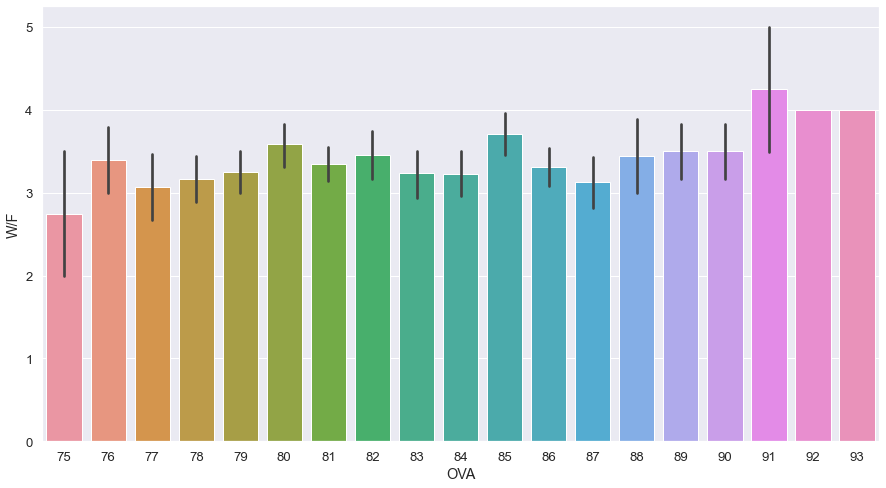

In [1193]:
plt.figure(figsize = (15,8))
sns.barplot(data = fifa_compare, y = "W/F",x = "OVA")
plt.show()

In [1275]:
def func(x):
    if "B" in x:
        return "B"
    elif "GK" in x:
        return "GK"
    elif "M" in x:
        return "M"
    elif "F" in x:
        return "F"
    elif "W" in x:
        return "W"
    elif "S" in x:
        return "S"


In [1278]:
fifa_basic_top["Main Position"] = fifa_basic_top.BP.apply(func)

In [1320]:
pos = fifa_basic_top.groupby("Main Position")[["Weight","Height(cm)"]].mean().sort_values(by = "Height(cm)", ascending = False)

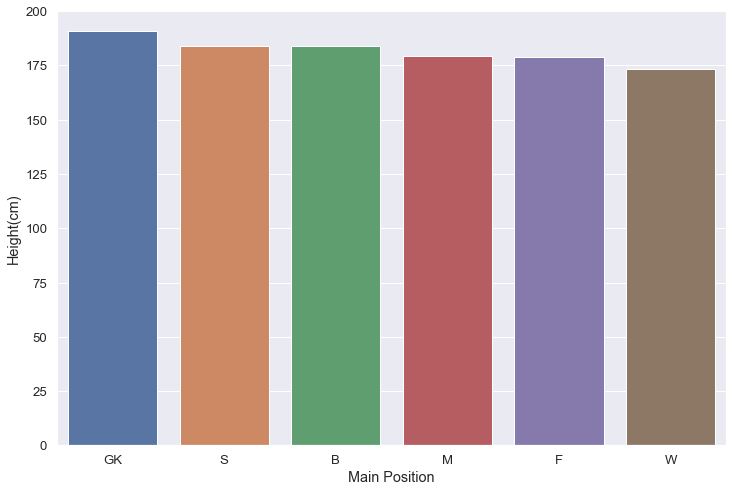

In [1321]:
plt.figure(figsize = (12, 8))
sns.barplot(data = pos, x = pos.index, y = "Height(cm)")
plt.show()

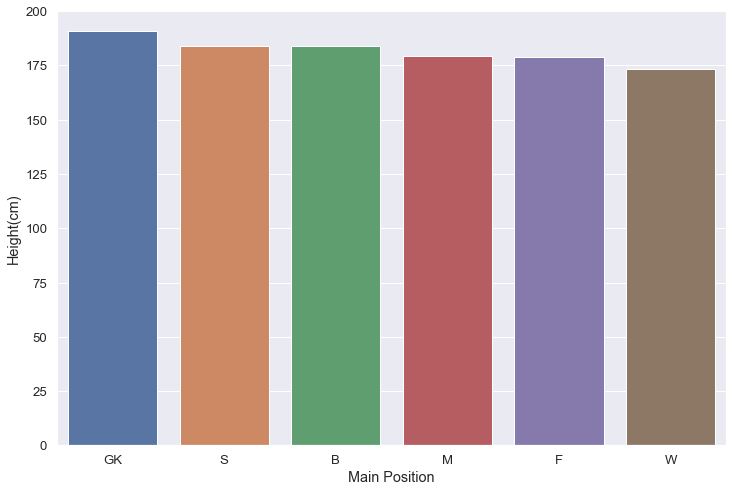

In [1357]:
plt.figure(figsize = (12, 8))
sns.barplot(data = pos, x = pos.index, y = "Height(cm)")
plt.show()

In [1254]:
corrmat = fifa_compare[["Age", "OVA","Weight", "Height(cm)", "PAC", "DEF","W/F","SM","IR", "PAC", "SHO", "PAS","DRI","DEF", "PHY" ]].corr()

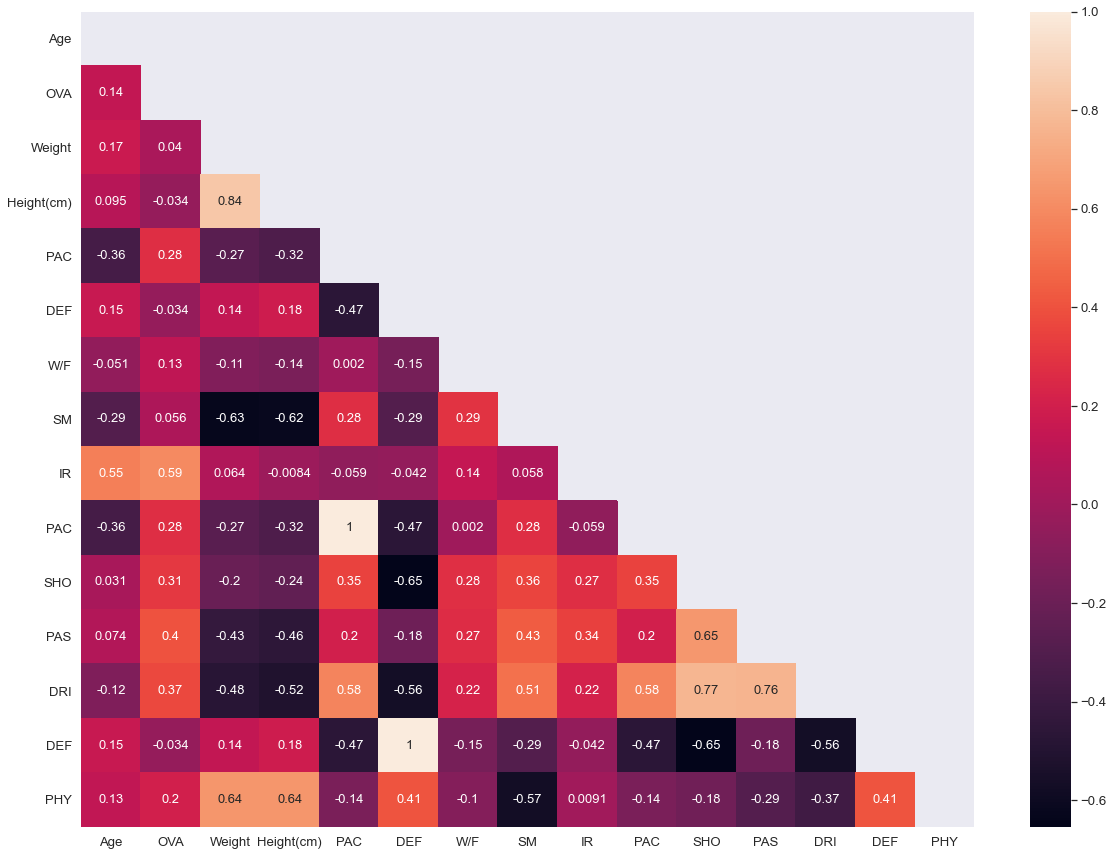

In [1257]:
plt.figure(figsize = (20,15))

# Creating mask for the upper triangle of the heatmap!
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

# remember to make use of the mask-param!!

sns.heatmap(corrmat, annot = True, mask = mask, annot_kws = {'size':13})
plt.show()

In [1396]:
fifa_basics.to_csv("fifa_basics.csv")

,Club,Name,ID,Age,OVA,Nationality,BOV,BP,Position,POT,Weight,foot,Growth,Value,Wage,Height(cm),Main Position
0,Sevilla FC,Jesús Navas,146536,34,84,Spain,84,RB,RB RM,84,59.9,Right,0,11000000,43000,172.7,B
1,Sevilla FC,Diego Carlos,219693,27,83,Brazil,84,CB,CB,85,86.2,Right,2,27000000,39000,185.4,B
2,Sevilla FC,Fernando,184134,32,83,Brazil,83,CDM,CDM CM,83,76.2,Right,0,17000000,39000,182.9,M
3,Sevilla FC,M. Acuña,224334,28,83,Argentina,83,LB,LB LM,83,69.0,Left,0,22000000,41000,172.7,B
4,Sevilla FC,T. Vaclík,204120,31,82,Czech Republic,82,GK,GK,82,84.8,Right,0,14000000,29000,188.0,GK
5,Sevilla FC,L. Ocampos,205632,25,82,Argentina,84,ST,RW LW,83,83.9,Right,1,265000000,40000,188.0,S
6,Sevilla FC,I. Rakitić,168651,32,82,Croatia,82,CM,CM,82,78.0,Right,0,17000000,39000,182.9,M
7,Sevilla FC,B. Trémoulinas,177635,30,81,France,81,LB,LB,81,64.9,Left,0,115000000,20000,172.7,B
8,Sevilla FC,Suso,202651,26,81,Spain,82,CAM,RW CAM,81,69.8,Left,0,19000000,39000,175.3,M
9,Sevilla FC,Escudero,192679,30,80,Spain,80,LB,LB LM,80,72.1,Left,0,115000000,31000,175.3,B
